In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Prepare the data for Logistic Regression

### Read the relevant data sets

In [68]:
data = pd.read_csv('final_features.csv')

In [69]:
data.shape

(5410, 43)

In [70]:
fraud = pd.read_csv('Train_fraud.csv')

In [71]:
data.head(100)

,Provider,ClaimID,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diag,V5861_diag,2724_diag,4011_diag,2449_diag,4019_diag,25000_diag,42731_diag,4019_proc,9904_proc,2724_proc,8154_proc,66_proc,3893_proc,3995_proc,4516_proc,3722_proc,8151_proc,8872_proc,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_days
0,PRV51001,25,11,5.0,2,3,80.0,8.0,12,1,0,2,0,1,3,1,2,0,0,1,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,78,62.0,39,48,693.0,29.0,29,7,6,16,3,12,25,15,11,3,0,1,2,1,2,2,1,2,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,28,0.0,0,0,385.0,23.0,76,2,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,252,0.0,0,0,3016.0,259.0,565,56,47,73,62,30,140,54,23,0,0,0,0,0,0,0,0,0,0,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,17,3.0,1,1,215.0,11.0,31,2,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333
5,PRV51008,43,9,2.0,2,2,136.0,10.0,17,0,2,7,2,3,9,4,2,0,0,0,0,0,0,0,0,0,0,0,36.0,10.0,828.604651,53.860465,0.186047,0.558140,6592.093023,12.000000,12.000000,620.930233,2570.465116,616.046512,3.906977,74.604651,1.534884
6,PRV51011,58,13,1.0,0,0,147.0,12.0,29,0,1,5,2,5,10,2,0,0,0,0,0,0,0,0,0,0,0,0,53.0,28.0,286.724138,23.586207,0.086207,0.534483,4414.827586,12.000000,12.000000,674.275862,1399.310345,366.724138,4.586207,73.431034,0.551724
7,PRV51012,48,17,0.0,0,0,123.0,7.0,22,1,1,2,2,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,31.0,15.0,351.875000,2.083333,0.000000,0.770833,6935.416667,12.000000,11.500000,839.916667,3793.958333,735.208333,4.625000,73.541667,3.708333
8,PRV51013,46,12,0.0,0,0,117.0,11.0,19,4,0,2,2,1,4,2,0,0,0,0,0,0,0,0,0,0,0,0,44.0,9.0,323.478261,5.000000,0.000000,0.739130,3635.652174,12.000000,12.000000,593.304348,3226.521739,914.782609,4.413043,73.413043,1.456522
9,PRV51014,30,5,0.0,0,0,110.0,8.0,8,2,0,2,0,1,6,4,1,0,0,0,0,0,0,0,0,0,0,0,25.0,8.0,349.333333,4.000000,0.000000,0.766667,2786.333333,12.000000,12.000000,427.200000,1742.333333,649.333333,4.333333,70.200000,0.466667


### Binary code PotentialFraud and merge fraud with data

In [72]:
fraud['PotentialFraud'] = [1 if x == 'Yes' else 0 for x in fraud['PotentialFraud']]

In [73]:
fraud.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


In [74]:
final_data = pd.merge(data, fraud, how="outer", on="Provider")

In [75]:
final_data.drop(['Provider'],axis=1, inplace=True)

In [76]:
final_data.shape

(5410, 43)

# Logistic Regression Analysis

From https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

"...evaluation metrics like ROC-AUC curve are a good indicator of classifier performance. It is a measure of how good model is at distinguishing between various class. Higher the ROC-AUC score, better the model is at predicting 0s as 0s and 1s as 1s. Just to remind, ROC is a probability curve and AUC represents degree or measure of separability. Apart from this metric, we will also check on recall score, false-positive (FP) and false-negative (FN) score as we build our classifier."

### Split into train and test for cross-validation

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler

# split dataset into x,y
x = final_data.drop(['PotentialFraud'],axis=1)
y = final_data['PotentialFraud']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.3, random_state=13)

### Default model without class_weight or penalization

In [78]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None, max_iter=2000)
# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print(fbeta_score(y_test, y_pred, average='binary', beta=2))
print(fbeta_score(y_test, y_pred, average='binary', beta=1)) #to check for accuracy

Accuracy Score: 0.9279112754158965
Confusion Matrix: 
[[1440   17]
 [ 100   66]]
Area Under Curve: 0.6929612754380597
Recall score: 0.39759036144578314
Precision score: 0.7951807228915663
F1 score: 0.5301204819277109
0.6626506024096387
0.4417670682730924
0.5301204819277109


In [31]:
y_test.value_counts()

0    1457
1     166
Name: PotentialFraud, dtype: int64

### Weighted model based on proportion of data with majority label (PotentialFraud=0) vs. minority label (PotentialFraud=1)

In [55]:
print("majority label is %f of the data set" %((4904/5410)*100)) #4904 providers are non fraudulent
print("minority label is %f of the data set" %((506/5410)*100)) #506 providers are potentially fraudulent

majority label is 90.646950 of the data set
minority label is 9.353050 of the data set


In [79]:
# define class weights
w = {0:9, 1:91}# define model
lg2 = LogisticRegression(random_state=13, class_weight=w, max_iter=2000)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

Accuracy Score: 0.8884781269254467
Confusion Matrix: 
[[1311  146]
 [  35  131]]
Area Under Curve: 0.8444753619832798
Recall score: 0.7891566265060241
Precision score: 0.4729241877256318
F1 score: 0.5914221218961625
F0.5 score: 0.514129
F2 score: 0.696068


### Weights GridSearch to identify ideal class_weight parameter

In [80]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [81]:
# define model
lg3 = LogisticRegression(random_state=13, max_iter = 2000)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring='precision', cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7501904761904763 with param: {'class_weight': {0: 1.0, 1: 1.0}}


From https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

"Note that optimal value of weights distribution identified by GridSearch is slightly different than what we used before i.e. inverse of class distribution. Factors that played out here are evaluation metric and cross-validation. You might receive a different weights value if you choose to work with a different evaluation metric. Using above weight values, lets build logistic regression."

### Conduct logistic regression with best class_weight parameter

In [82]:
# define model
lg3 = LogisticRegression(random_state=13, class_weight={0: 1, 1: 1}, max_iter=2000)
# fit it
lg3.fit(X_train,y_train)
# test
y_pred = lg3.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

Accuracy Score: 0.9279112754158965
Confusion Matrix: 
[[1440   17]
 [ 100   66]]
Area Under Curve: 0.6929612754380597
Recall score: 0.39759036144578314
Precision score: 0.7951807228915663
F1 score: 0.5301204819277109
F0.5 score: 0.662651
F2 score: 0.441767


### Tune hyperparameters, including penalization, C, fit_intercept

In [83]:
# define hyperparameters
crange = np.arange(0.5, 2.0, 0.5)
hyperparam_grid = {"C": crange
                   ,"fit_intercept": [True, False]  }

In [84]:
# logistic model classifier
lg4 = LogisticRegression(random_state=13, penalty='l2', class_weight={0: 1.0, 1: 1}, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="precision", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7513571428571428 with param: {'C': 0.5, 'fit_intercept': True}


In [85]:
# define model
from sklearn.metrics import fbeta_score
lg4 = LogisticRegression(random_state=13,C=0.5,fit_intercept=True, penalty='l2',class_weight={0: 1.0, 1: 1}, max_iter=2000)
# fit it
lg4.fit(X_train,y_train)
# test
y_pred = lg4.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

Accuracy Score: 0.929143561306223
Confusion Matrix: 
[[1441   16]
 [  99   67]]
Area Under Curve: 0.6963164945299386
Recall score: 0.4036144578313253
Precision score: 0.8072289156626506
F1 score: 0.5381526104417671
F0.5 score: 0.672691
F2 score: 0.448461


In [86]:
# logistic model classifier
lg5 = LogisticRegression(random_state=13, penalty='l1', solver='liblinear', class_weight={0: 1.0, 1: 1}, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="precision", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7513571428571428 with param: {'C': 0.5, 'fit_intercept': True}


In [87]:
# define model
lg5 = LogisticRegression(random_state=13,C=0.5,fit_intercept=True, penalty='l1',solver='liblinear',class_weight={0: 1.0, 1: 1}, max_iter=2000)
# fit it
lg5.fit(X_train,y_train)
# test
y_pred = lg5.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

Accuracy Score: 0.9285274183610598
Confusion Matrix: 
[[1441   16]
 [ 100   66]]
Area Under Curve: 0.6933044463371675
Recall score: 0.39759036144578314
Precision score: 0.8048780487804879
F1 score: 0.532258064516129
F0.5 score: 0.668016
F2 score: 0.442359


### Get Feature Importance based on ideal model

Feature: 0, Score: 0.50205
Feature: 1, Score: 0.55536
Feature: 2, Score: 0.36739
Feature: 3, Score: 0.34529
Feature: 4, Score: 0.50618
Feature: 5, Score: 0.39233
Feature: 6, Score: 0.33653
Feature: 7, Score: 0.24519
Feature: 8, Score: 0.35498
Feature: 9, Score: 0.26887
Feature: 10, Score: 0.34475
Feature: 11, Score: 0.10222
Feature: 12, Score: 0.07320
Feature: 13, Score: 0.41899
Feature: 14, Score: 0.08243
Feature: 15, Score: 0.49394
Feature: 16, Score: 0.22472
Feature: 17, Score: 0.06369
Feature: 18, Score: 0.03507
Feature: 19, Score: 0.04957
Feature: 20, Score: 0.09816
Feature: 21, Score: 0.03458
Feature: 22, Score: 0.10397
Feature: 23, Score: 0.06080
Feature: 24, Score: 0.12788
Feature: 25, Score: 0.10269
Feature: 26, Score: 0.01719
Feature: 27, Score: 0.87340
Feature: 28, Score: 0.21519
Feature: 29, Score: 0.09570
Feature: 30, Score: 0.22337
Feature: 31, Score: 0.12540
Feature: 32, Score: 0.06367
Feature: 33, Score: 0.08849
Feature: 34, Score: 0.01485
Feature: 35, Score: 0.01847
Fe

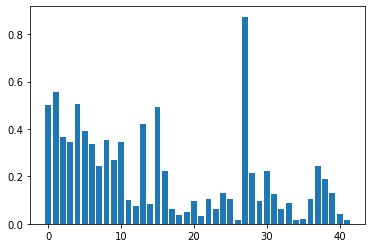

In [88]:
# get importance
importance = abs(lg4.coef_[0])
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#The positive scores indicate a feature that predicts class 1, 
#whereas the negative scores indicate a feature that predicts class 0.

In [42]:
x.columns

Index(['ClaimID', 'ClmAdmitDiagnosisCode', 'Inpatient', 'ClmProcedureCode',
       'ClmProcedureCode_count', 'ClmDiagnosisCode_count',
       'RenalDiseaseIndicator', 'duplicate', 'V5869_diag', 'V5861_diag',
       '2724_diag', '4011_diag', '2449_diag', '4019_diag', '25000_diag',
       '42731_diag', '4019_proc', '9904_proc', '2724_proc', '8154_proc',
       '66_proc', '3893_proc', '3995_proc', '4516_proc', '3722_proc',
       '8151_proc', '8872_proc', 'Patient_Connections', 'AttPhys_Connections',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'treatment_days',
       'Gender', 'IPAnnualReimbursementAmt', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
       'Age', 'claim_days'],
      dtype='object')

### Summary of Feature Importance


The following features are most important in classification of fraud vs. non-fraud. 

- Patient_Connections
- ClmAdmitDiagnosisCode
- ClmProcedureCode_count
- ClaimID
- 42731_diag
- 4019_diag
- Inpatient
- V5869_diag
- ClmProcedureCode
- 2724_diag
- RenalDiseaseIndicator
- V5861_diag
- duplicate
- 4019_proc

